<a href="https://colab.research.google.com/github/RihabBNA/fullpack-ia-module-1/blob/main/Test_Technique_de_Module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1 : Analyse du Churn des Utilisateurs de Waze**

**Tâche 1 : Exploration des Données (EDA)**




🔽**1. Charger le dataset et afficher les premières lignes.**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
df = pd.read_csv('/content/drive/MyDrive/Full Pack IA/Module 1: Data Analysis /waze_dataset.csv', delimiter=';')

In [60]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0.0,retained,283.0,226.0,296.748273,2276.0,208.0,0.0,2628.845068,1985.775061,28.0,19.0,Android
1,1.0,retained,133.0,107.0,326.896596,1225.0,19.0,64.0,13715.920550,3160.472914,13.0,11.0,iPhone
2,2.0,retained,114.0,95.0,135.522926,2651.0,0.0,0.0,3059.148818,1610.735904,14.0,8.0,Android
3,3.0,retained,49.0,40.0,67.589221,15.0,322.0,7.0,913.591123,587.196542,7.0,3.0,iPhone
4,4.0,retained,84.0,68.0,168.247020,1562.0,166.0,5.0,3950.202008,1219.555924,27.0,18.0,Android


⚡
Ce dataset, nommé waze_dataset, semble contenir des données d'utilisation de l'application Waze par différents utilisateurs.⚡

**🔽2. Identifier le nombre total de valeurs manquantes par colonne.**

In [61]:
df.shape

(14999, 13)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14997 non-null  float64
 1   label                    14296 non-null  object 
 2   sessions                 14997 non-null  float64
 3   drives                   14997 non-null  float64
 4   total_sessions           14997 non-null  float64
 5   n_days_after_onboarding  14996 non-null  float64
 6   total_navigations_fav1   14997 non-null  float64
 7   total_navigations_fav2   14997 non-null  float64
 8   driven_km_drives         14996 non-null  float64
 9   duration_minutes_drives  14995 non-null  float64
 10  activity_days            14996 non-null  float64
 11  driving_days             14997 non-null  float64
 12  device                   14997 non-null  object 
dtypes: float64(11), object(2)
memory usage: 1.5+ MB


In [63]:
missing_values = df.isnull().sum()
print(" Valeurs manquantes par colonne :\n", missing_values)

 Valeurs manquantes par colonne :
 ID                           2
label                      703
sessions                     2
drives                       2
total_sessions               2
n_days_after_onboarding      3
total_navigations_fav1       2
total_navigations_fav2       2
driven_km_drives             3
duration_minutes_drives      4
activity_days                3
driving_days                 2
device                       2
dtype: int64


**🔽3. Remplacer les valeurs manquantes par une méthode appropriée (moyenne, médiane, ou autre) et justifier le choix.**

⚡ ✅ **Imputation des données**


▶ **Pour les colonnes numériques**
[ID,sessions, drive, total_sessions,
 n_days_after_onboarding, total_navigations_fav1,
  total_navigations_fav2,
   driven_km_drives,
  duration_minutes_drives,   activity_days,  driving_days]
J'ai choisi de remplacer les valeurs manquantes par **"la moyenne"**


▶ **Pour les colonne catégorielles**
[label,  device],
J'ai choisi de remplacer les valeurs manquantes par la valeur par **"le mode"**
⚡

In [64]:
for column in ['ID', 'sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
               'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
               'duration_minutes_drives', 'activity_days', 'driving_days']:
    df[column] = df[column].fillna(df[column].mean())

In [65]:
for column in ['label', 'device']:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

In [66]:
print(" Valeurs manquantes par colonne :\n", df.isnull().sum())

 Valeurs manquantes par colonne :
 ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64


**🔽4 .Afficher les statistiques descriptives des variables numériques.**

In [67]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.00000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.96526,80.575048,67.229646,189.777020,1752.105828,121.436621,29.625725,4036.643232,1860.174857,15.530275,12.177369
std,4329.17666,80.648359,65.875674,136.207883,1008.382899,148.007593,45.392705,2500.210372,1444.156791,8.997537,7.815200
min,0.00000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3751.50000,23.000000,20.000000,90.759771,881.000000,9.000000,0.000000,2216.498385,837.311598,8.000000,5.000000
50%,7499.96526,56.000000,48.000000,159.266291,1746.000000,70.000000,9.000000,3489.546991,1479.966285,16.000000,12.000000
75%,11248.50000,111.000000,93.000000,253.867298,2629.000000,177.000000,43.000000,5285.430143,2462.674883,23.000000,19.000000
max,14998.00000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


**🔽5. Générer des histogrammes pour visualiser la distribution de total_km, driving_days et total_drives.**

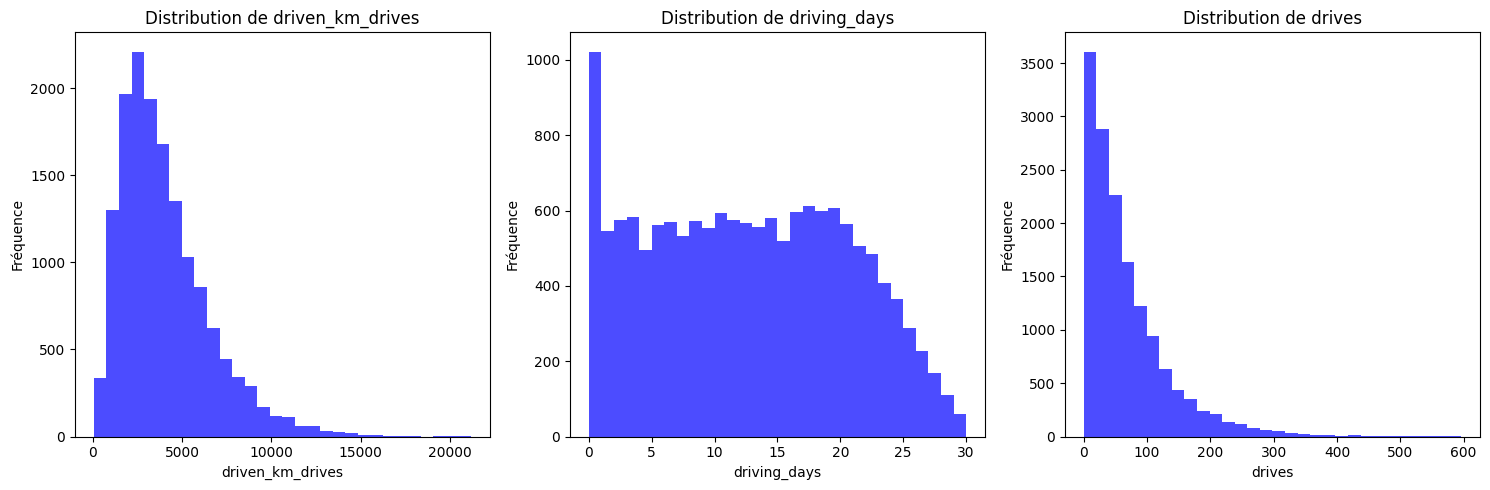

In [68]:
columns_to_plot = ['driven_km_drives', 'driving_days', 'drives']

plt.figure(figsize=(15, 5))

for i, column in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1)
    plt.hist(df[column], bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()


**🔽6. Calculer une matrice de corrélation et identifier la paire de variables la plus corrélée.**

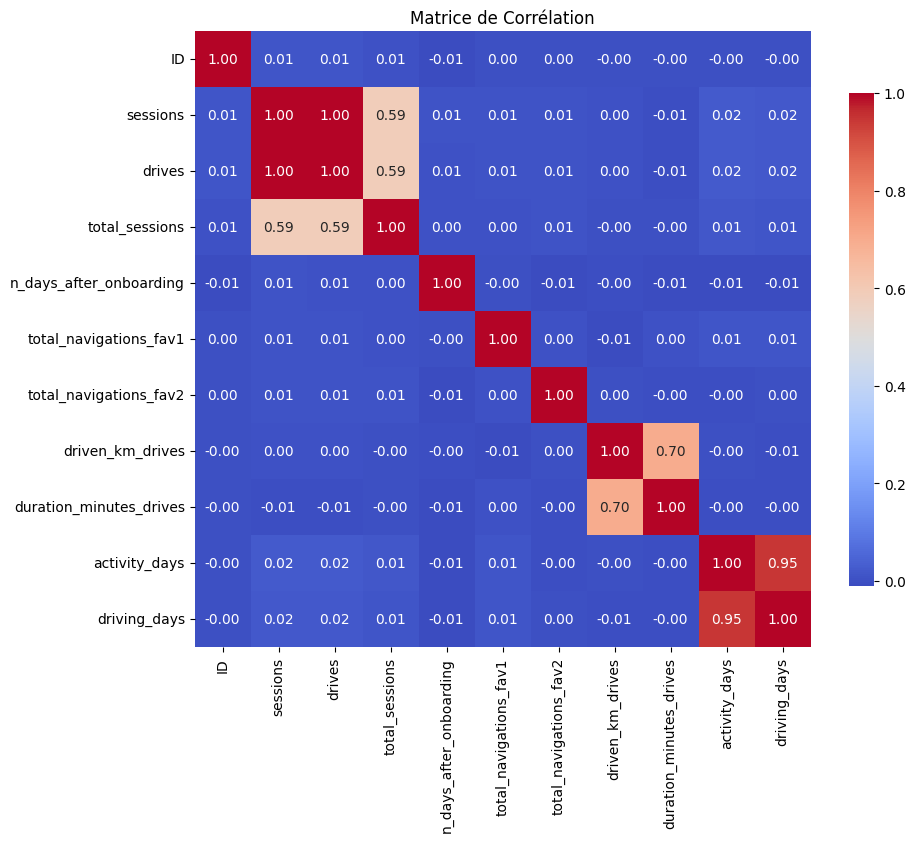

La paire de variables la plus corrélée est : ('sessions', 'drives') avec une corrélation de 1.00


In [69]:

correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de Corrélation')
plt.show()

correlation_pairs = correlation_matrix.unstack()
correlation_pairs = correlation_pairs[correlation_pairs != 1]
max_corr_pair = correlation_pairs.idxmax()
max_corr_value = correlation_pairs.max()

print(f"La paire de variables la plus corrélée est : {max_corr_pair} avec une corrélation de {max_corr_value:.2f}")

**Tâche 2 : Feature Engineering**

**🔽1. Création de la variable km_per_driving_day.**

In [70]:
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']


In [71]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day
0,0.0,retained,283.0,226.0,296.748273,2276.0,208.0,0.0,2628.845068,1985.775061,28.0,19.0,Android,138.360267
1,1.0,retained,133.0,107.0,326.896596,1225.0,19.0,64.0,13715.920550,3160.472914,13.0,11.0,iPhone,1246.901868
2,2.0,retained,114.0,95.0,135.522926,2651.0,0.0,0.0,3059.148818,1610.735904,14.0,8.0,Android,382.393602
3,3.0,retained,49.0,40.0,67.589221,15.0,322.0,7.0,913.591123,587.196542,7.0,3.0,iPhone,304.530374
4,4.0,retained,84.0,68.0,168.247020,1562.0,166.0,5.0,3950.202008,1219.555924,27.0,18.0,Android,219.455667


In [72]:
df['km_per_driving_day'] = df['km_per_driving_day'].replace([np.inf, -np.inf], 0)

In [73]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day
count,14999.00000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.96526,80.575048,67.229646,189.777020,1752.105828,121.436621,29.625725,4036.643232,1860.174857,15.530275,12.177369,578.283022
std,4329.17666,80.648359,65.875674,136.207883,1008.382899,148.007593,45.392705,2500.210372,1444.156791,8.997537,7.815200,1029.523940
min,0.00000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000
25%,3751.50000,23.000000,20.000000,90.759771,881.000000,9.000000,0.000000,2216.498385,837.311598,8.000000,5.000000,136.614642
50%,7499.96526,56.000000,48.000000,159.266291,1746.000000,70.000000,9.000000,3489.546991,1479.966285,16.000000,12.000000,272.591429
75%,11248.50000,111.000000,93.000000,253.867298,2629.000000,177.000000,43.000000,5285.430143,2462.674883,23.000000,19.000000,557.590570
max,14998.00000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15420.234110


**🔽2. Création de la variable professional_driver.**

In [74]:
df['professional_driver'] = ((df['drives'] >= 60) & (df['driving_days'] >= 15)).astype(int)

In [75]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver
0,0.0,retained,283.0,226.0,296.748273,2276.0,208.0,0.0,2628.845068,1985.775061,28.0,19.0,Android,138.360267,1
1,1.0,retained,133.0,107.0,326.896596,1225.0,19.0,64.0,13715.920550,3160.472914,13.0,11.0,iPhone,1246.901868,0
2,2.0,retained,114.0,95.0,135.522926,2651.0,0.0,0.0,3059.148818,1610.735904,14.0,8.0,Android,382.393602,0
3,3.0,retained,49.0,40.0,67.589221,15.0,322.0,7.0,913.591123,587.196542,7.0,3.0,iPhone,304.530374,0
4,4.0,retained,84.0,68.0,168.247020,1562.0,166.0,5.0,3950.202008,1219.555924,27.0,18.0,Android,219.455667,1


In [76]:
driver_distribution = df['professional_driver'].value_counts()
print("Répartition des conducteurs professionnels :")
print(driver_distribution)

Répartition des conducteurs professionnels :
professional_driver
0    12415
1     2584
Name: count, dtype: int64


In [77]:
# Calculer le churn rate pour les professionnels et non-professionnels
professional_churn_rate = df[df['professional_driver'] == 1]['label'].value_counts(normalize=True).get('churned', 0) * 100
non_professional_churn_rate = df[df['professional_driver'] == 0]['label'].value_counts(normalize=True).get('churned', 0) * 100

print(f'Churn Rate Professionnels: {professional_churn_rate}%')
print(f'Churn Rate Non-Professionnels: {non_professional_churn_rate}%')

Churn Rate Professionnels: 7.236842105263158%
Churn Rate Non-Professionnels: 18.880386629077726%


⚡**Interprétation**  ⚡
✅ Les conducteurs professionnels sont plus fidèles à Waze que les non-professionnels.
Leur churn rate (7.24%) est nettement plus bas que celui des non-professionnels (18.88%).
Cela signifie qu’ils sont plus susceptibles de continuer à utiliser Waze sur le long terme.
✅ Les non-professionnels ont un churn rate plus élevé.
Avec 18.88% de churn, ils arrêtent d’utiliser Waze plus souvent que les professionnels.
Peut-être que l’application ne répond pas autant à leurs besoins ou qu’ils ont moins d’habitude d’utiliser des outils de navigation régulièrement.

**Tâche 3 : Encodage et Vérification de la Multicolinéarité**

**🔽1. Encodage de la variable churned.**

In [78]:
# Encodage : churned → 1, retained → 0
df['label2'] = df['label'].map({'retained': 0, 'churned': 1})

In [79]:
print("Répartition de la variable label2 :")
print(df['label2'].value_counts())

Répartition de la variable label2 :
label2
0    12468
1     2531
Name: count, dtype: int64


**🔽2. Encodage de la variable device.**

In [80]:
df['device2'] = df['device'].map({'Android': 0, 'iPhone': 1})

In [81]:
print("Répartition de la variable device2 :")
print(df['device2'].value_counts())

Répartition de la variable device2 :
device2
1    9685
0    5314
Name: count, dtype: int64


**🔽3. Vérification de la Multicolinéarité.**

In [82]:
correlation_matrix = df.select_dtypes(include=np.number).corr()

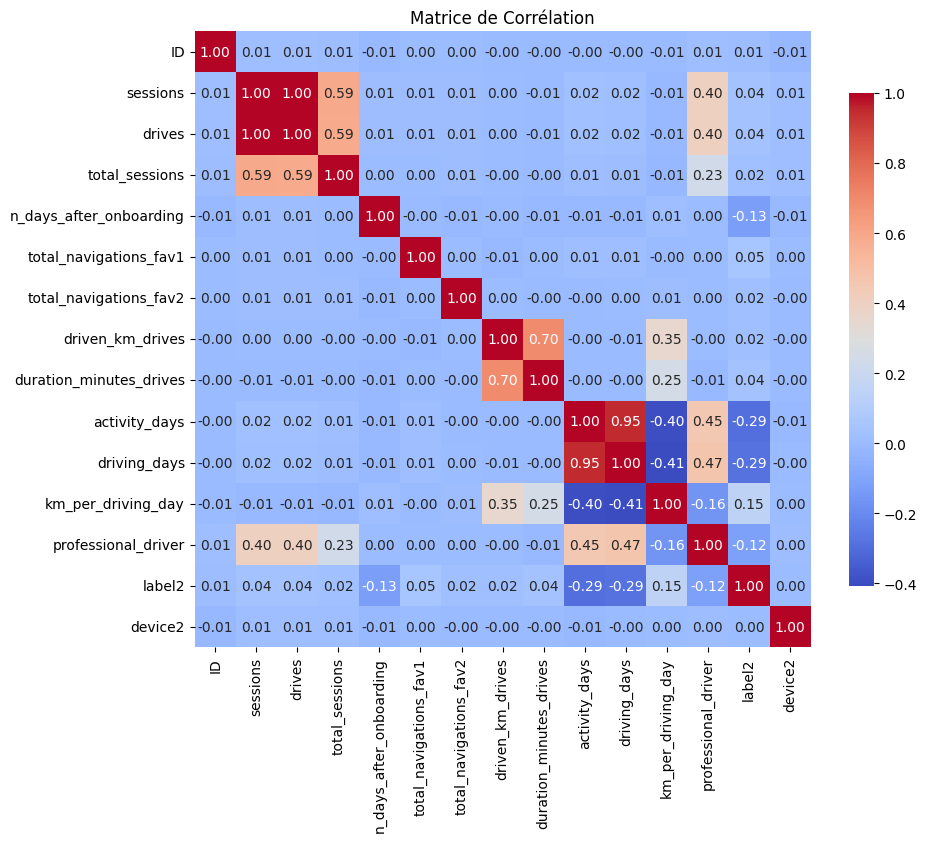

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de Corrélation')
plt.show()

In [84]:
threshold = 0.7
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print("\nPaires de variables avec corrélation > 0.7 :")
for pair in high_corr_pairs:
    print(f"{pair[0]} et {pair[1]} : {pair[2]:.2f}")


Paires de variables avec corrélation > 0.7 :
drives et sessions : 1.00
driving_days et activity_days : 0.95


⚡
✅**Variable à Supprimer :** Je recommande de supprimer la variable "**sessions**" et "**activity_days**".

Explication:

▶"drives" et "sessions" ont une corrélation parfaite (1.00). Cela indique que ces deux variables contiennent exactement la même information. Puisque drives représente le nombre de trajets et sessions le nombre de sessions Waze, garder les deux est redondant.

▶"driving_days" et "activity_days" ont une corrélation de 0.95. Cela montre que ces deux variables évoluent presque de la même manière.
driving_days représente les jours où l'utilisateur a conduit, tandis que activity_days inclut peut-être d'autres types d’activité (comme ouvrir l'application sans conduire).
⚡

# **Task 2 : Analyse des Séries Temporelles**

**🔽1. Préparation et Exploration des Données.**

**1.  Charger le dataset et afficher les premières lignes.**

In [85]:
df2 = pd.read_csv('/content/drive/MyDrive/Full Pack IA/Module 1: Data Analysis /daily-minimum-temperatures-in-me.csv')

In [86]:
df2.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


**2. Vérifier le type des données et convertir Date en format datetime si nécessaire.**

In [87]:
print(df2.dtypes)

Date                          object
Daily minimum temperatures    object
dtype: object


In [88]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        3650 non-null   datetime64[ns]
 1   Daily minimum temperatures  3650 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 57.2+ KB


**3.Vérifier la présence de valeurs manquantes et les traiter si nécessaire.**

In [90]:
df2.isnull().sum()

,0
Date,0
Daily minimum temperatures,0


**4. Afficher des statistiques descriptives sur la température (min, max, moyenne, médiane).**

In [91]:
df2['Daily minimum temperatures'] = pd.to_numeric(df2['Daily minimum temperatures'], errors='coerce')
min_temp = df2['Daily minimum temperatures'].min()
max_temp = df2['Daily minimum temperatures'].max()
mean_temp = df2['Daily minimum temperatures'].mean()
median_temp = df2['Daily minimum temperatures'].median()

print(f'Température minimale : {min_temp} °C')
print(f'Température maximale : {max_temp} °C')
print(f'Température moyenne : {mean_temp:.2f} °C')
print(f'Température médiane : {median_temp} °C')

Température minimale : 0.0 °C
Température maximale : 26.3 °C
Température moyenne : 11.19 °C
Température médiane : 11.0 °C


**5. Tracer l’évolution de la température sur toute la période couverte par les données.**

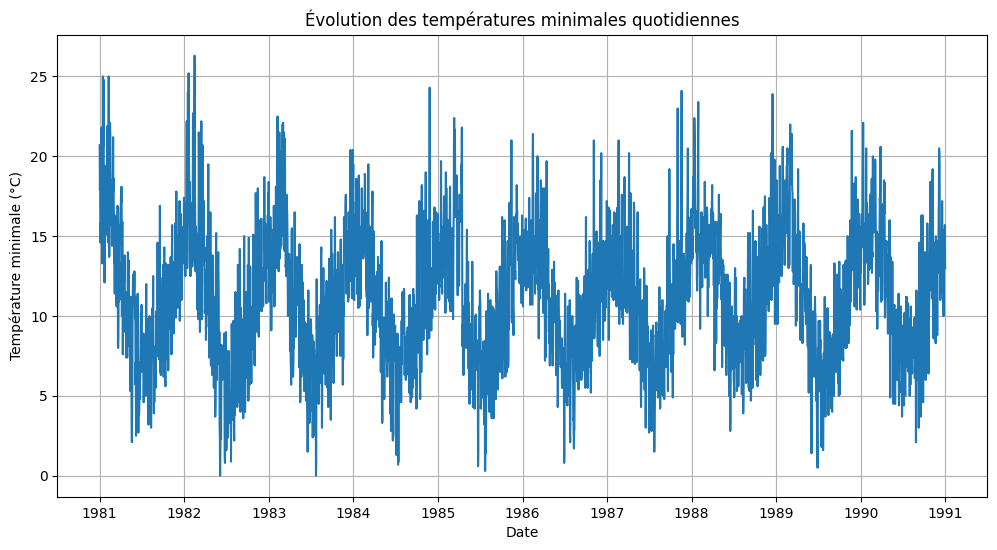

In [92]:
plt.figure(figsize=(12, 6))
plt.plot(df2['Date'], df2['Daily minimum temperatures'])
plt.title('Évolution des températures minimales quotidiennes')
plt.xlabel('Date')
plt.ylabel('Température minimale (°C)')
plt.grid()
plt.show()

❌❌❌❌❌❌

Cette partie n'est pas demandée dans les questions du test, mais j'ai remarqué qu'après la conversion de la colonne "Daily minimum temperatures" en numérique (question 1.4), des valeurs manquantes se sont présentées.
 Je dois donc les remplir.



In [93]:
print(df2.dtypes)

Date                          datetime64[ns]
Daily minimum temperatures           float64
dtype: object


In [94]:
df2.isnull().sum()

,0
Date,0
Daily minimum temperatures,3


❌❌❌❌❌❌

🔽2. Analyse des Tendances et Décomposition de la Série

**6. Décomposer la série temporelle en tendance, saisonnalité et résidu.**

In [95]:
df2.set_index("Date", inplace=True)


In [96]:
df2.head()

,Daily minimum temperatures
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


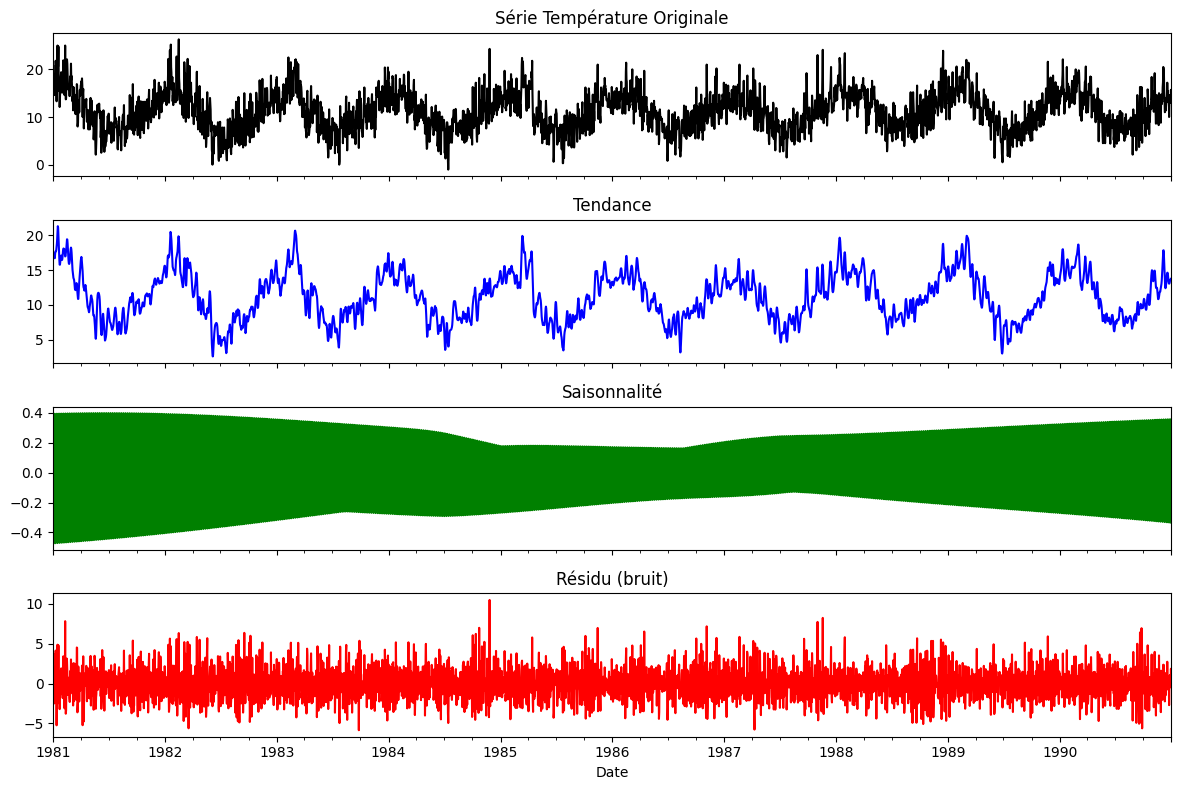

In [97]:
from statsmodels.tsa.seasonal import STL

# Vérifier que l'index est bien une série temporelle avec une fréquence quotidienne
df2 = df2.asfreq('D')

# Imputation des valeurs manquantes
"""#####Je teste plusieurs méthodes :#####"
 interpolate(method='spline', order=3) ===> Si les données ont une tendance saisonnière.
 interpolate(method='linear') ==> Si les valeurs manquantes sont isolées.
 fillna(method='ffill') ==> Si les variations sont lentes.
"""
#df2['Daily minimum temperatures'] = df2['Daily minimum temperatures'].interpolate(method='linear')
df2['Daily minimum temperatures'] = df2['Daily minimum temperatures'].interpolate(method='spline', order=3)
#df2['Daily minimum temperatures'] = df2['Daily minimum temperatures'].fillna(method='ffill')



# Décomposition STL avec une saisonnalité annuelle (365 jours)
stl = STL(df2['Daily minimum temperatures'], seasonal=365)
result = stl.fit()

# Tracer les composantes
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

df2['Daily minimum temperatures'].plot(ax=axes[0], title="Série Température Originale", color="black")
result.trend.plot(ax=axes[1], title="Tendance", color="blue")
result.seasonal.plot(ax=axes[2], title="Saisonnalité", color="green")
result.resid.plot(ax=axes[3], title="Résidu (bruit)", color="red")

plt.tight_layout()
plt.show()



⚡Interprétation des Graphiques de Température⚡

✅Série Température Originale (en noir) :
Montre les variations des températures minimales au fil du temps. On observe des fluctuations importantes, indiquant des changements fréquents.

✅Tendance (en bleu) :
Représente la direction générale des températures. Une ligne stable signifie qu'il n'y a pas eu de changement significatif des températures au fil des ans.

✅Saisonnalité (en vert) :
Indique les variations saisonnières. Elle est relativement plate, cela suggère qu'il n'y a pas de grands changements liés aux saisons.

✅Résidu (en rouge) :
Montre les erreurs du modèle. Des fluctuations aléatoires autour de zéro indiquent que le modèle a bien capturé les tendances et la saisonnalité.

**7. Appliquer une moyenne mobile (7 jours et 30 jours) et comparer avec la série originale.**

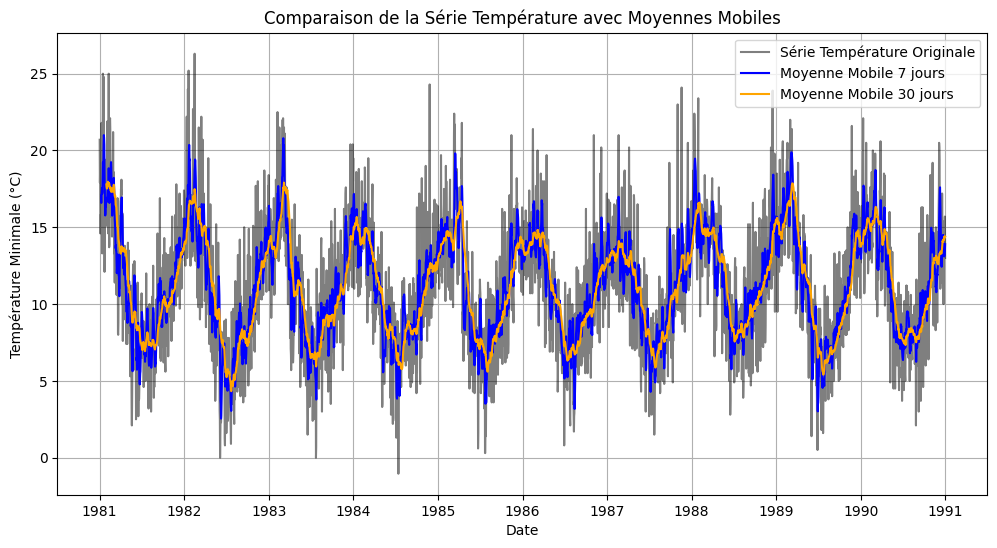

In [98]:
# Calculer les moyennes mobiles
df2['MA_7'] = df2['Daily minimum temperatures'].rolling(window=7).mean()
df2['MA_30'] = df2['Daily minimum temperatures'].rolling(window=30).mean()

# Tracer la série originale avec les moyennes mobiles
plt.figure(figsize=(12, 6))
plt.plot(df2['Daily minimum temperatures'], label='Série Température Originale', color='black', alpha=0.5)
plt.plot(df2['MA_7'], label='Moyenne Mobile 7 jours', color='blue')
plt.plot(df2['MA_30'], label='Moyenne Mobile 30 jours', color='orange')
plt.title('Comparaison de la Série Température avec Moyennes Mobiles')
plt.xlabel('Date')
plt.ylabel('Température Minimale (°C)')
plt.legend()
plt.grid()
plt.show()

**8. Identifier les mois les plus froids et les plus chauds sur l’ensemble des années disponibles.**

In [99]:
df2['Month'] = df2.index.month

In [100]:
df2['Year'] = df2.index.year

In [101]:
monthly_avg = df2.groupby('Month')['Daily minimum temperatures'].mean()

In [102]:
coldest_month = monthly_avg.idxmin()
hottest_month = monthly_avg.idxmax()

In [103]:
print(monthly_avg)


Month
1     15.030323
2     15.373759
3     14.565484
4     12.088333
5      9.866452
6      7.278333
7      6.698936
8      7.891290
9      8.976333
10    10.309355
11    12.479667
12    13.860178
Name: Daily minimum temperatures, dtype: float64



⚡ D'après tes résultats, les températures moyennes mensuelles montrent une tendance qui correspond à un climat de l'hémisphère sud, où Juillet est en plein hiver et Février en plein été.⚡

⚡Explication :
En hémisphère nord (ex. France, Canada) → Janvier/Février sont généralement les plus froids, Juillet/Août les plus chauds.
En hémisphère sud (ex. Australie, Argentine) → Juillet est le plus froid, Février le plus chaud.⚡

In [104]:
months = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin',
          'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

print(f"Le mois le plus froid est : {months[coldest_month - 1]} avec une température moyenne de {monthly_avg.min():.2f}°C")
print(f"Le mois le plus chaud est : {months[hottest_month - 1]} avec une température moyenne de {monthly_avg.max():.2f}°C")

Le mois le plus froid est : Juillet avec une température moyenne de 6.70°C
Le mois le plus chaud est : Février avec une température moyenne de 15.37°C


**9. Calculer l’autocorrélation et tracer le graphique ACF (Autocorrelation Function).**

<Figure size 1200x600 with 0 Axes>

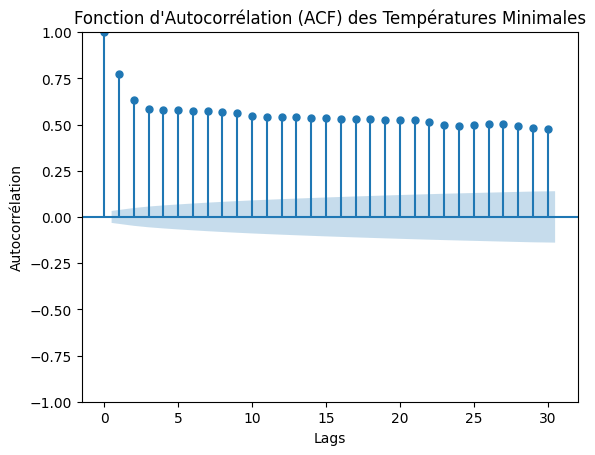

In [105]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(df2['Daily minimum temperatures'], lags=30)
plt.title('Fonction d\'Autocorrélation (ACF) des Températures Minimales')
plt.xlabel('Lags')
plt.ylabel('Autocorrélation')
plt.show()

⚡ Le graphique montre que les températures minimales ont une autocorrélation significative pour les lags courts, ce qui suggère que les températures d'un jour donné sont fortement influencées par celles des jours précédents. Cela peut indiquer des patterns saisonniers ou cycliques dans les données.⚡


**10. Identifier si la série est stationnaire en utilisant le test de Dickey-Fuller.**

In [106]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df2['Daily minimum temperatures'])

adf_statistic = result[0]
p_value = result[1]
lags = result[2]
nobs = result[3]
critical_values = result[4]

print(f"Statistique ADF : {adf_statistic}")
print(f"Valeur p : {p_value}")
print(f"Lags utilisés : {lags}")
print(f"Nombre d'observations : {nobs}")
print("Valeurs critiques :")
for key, value in critical_values.items():
    print(f"   {key} : {value}")

Statistique ADF : -4.441053175886827
Valeur p : 0.0002509239499385595
Lags utilisés : 20
Nombre d'observations : 3631
Valeurs critiques :
   1% : -3.4321522387754775
   5% : -2.862336328589075
   10% : -2.567193897993964


⚡ Les résultats montrent que la série des températures est stationnaire, ce qui signifie que ses propriétés statistiques ne changent pas au fil du temps. Cela permet d'utiliser la série pour des analyses et des prévisions sans transformations supplémentaires.⚡
